!pip install BeautifulSoup4, lxml, pandas, requests, IPython, googlemaps

In [1]:
import json, config
from urllib.request import urlopen
from bs4 import BeautifulSoup
import googlemaps

In [2]:
gmaps = googlemaps.Client(key=config.google_api_key)

In [3]:
url = "https://en.wikipedia.org/wiki/List_of_current_Major_League_Baseball_stadiums"

In [4]:
page = urlopen(url)

In [5]:
soup = BeautifulSoup(page, "lxml")

In [6]:
first_table = soup.find(
    'table', class_='wikitable sortable plainrowheaders')


In [7]:
A=[] #IMG
B=[] #Arena
C=[] #Capacity
D=[] #City
E=[] #Surface
F=[] #Team
G=[] #Opened
H=[] #Design
I=[] #Roof Type
J=[] #State

In [8]:
for row in first_table.findAll('tr'):
    cells=row.findAll(['td','th'])
    if cells[0].find(scope_=lambda x: x != 'col'):
        A.append(cells[0].find('img')['src'].replace("120px", "250px"))
        B.append(cells[1].find(text=True))
        ###this splits the city and state then puts them in their own arrays.
        location = cells[3].find(text=True).split(',')
        D.append(location[0])
        J.append(location[1].lstrip())
        C.append(cells[2].find(text=True).rstrip('\n'))
        E.append(cells[4].find(text=True).rstrip('\n'))
        F.append(cells[5].find(text=True))
        G.append(cells[6].find(text=True).rstrip('\n'))
        H.append(cells[8].find(text=True))
        I.append(cells[9].find(text=True).rstrip('\n'))


In [9]:
import pandas as pd
df=pd.DataFrame(F,columns=['Team'])
df['Arena']=B
df['City']=D
df['State'] = J
df['Capacity']=C
df['opened']=G
df['surface']=E
df['Roof Type']=I
df['Design']=H
df['image']=A
df

,Team,Arena,City,State,Capacity,opened,surface,Roof Type,Design,image
0,Milwaukee Brewers,American Family Field,Milwaukee,Wisconsin,"41,900",2001,Grass,Retractable,Retro-modern,//upload.wikimedia.org/wikipedia/commons/thumb...
1,Los Angeles Angels,Angel Stadium,Anaheim,California,"45,517",1966,Grass,Open,Modern,//upload.wikimedia.org/wikipedia/commons/thumb...
2,St. Louis Cardinals,Busch Stadium,St. Louis,Missouri,"45,494",2006,Grass,Open,Retro-classic,//upload.wikimedia.org/wikipedia/commons/thumb...
3,Arizona Diamondbacks,Chase Field,Phoenix,Arizona,"48,405",1998,Artificial turf,Retractable,Retro-modern,//upload.wikimedia.org/wikipedia/commons/thumb...
4,New York Mets,Citi Field,Queens,New York,"41,922",2009,Grass,Open,Retro-classic,//upload.wikimedia.org/wikipedia/commons/thumb...
5,Philadelphia Phillies,Citizens Bank Park,Philadelphia,Pennsylvania,"42,792",2004,Grass,Open,Retro-classic,//upload.wikimedia.org/wikipedia/commons/thumb...
6,Detroit Tigers,Comerica Park,Detroit,Michigan,"41,083",2000,Grass,Open,Retro-classic,//upload.wikimedia.org/wikipedia/commons/thumb...
7,Colorado Rockies,Coors Field,Denver,Colorado,"50,144",1995,Grass,Open,Retro-classic,//upload.wikimedia.org/wikipedia/commons/thumb...
8,Los Angeles Dodgers,Dodger Stadium,Los Angeles,California,"56,000",1962,Grass,Open,Modern,//upload.wikimedia.org/wikipedia/commons/thumb...
9,Boston Red Sox,Fenway Park,Boston,Massachusetts,"37,755",1912,Grass,Open,Jewel box,//upload.wikimedia.org/wikipedia/commons/thumb...


In [10]:
location = [];
for i in range(len(B)):
    searchTerm = B[i] + ", " + J[i]
    geocode_result = gmaps.geocode(searchTerm)
    data = geocode_result[0]['geometry']['location']
    tempArray = []
    tempArray.append(float(data['lng']))
    tempArray.append(float(data['lat']))
    location.append(tempArray[::-1])

response = geocoder.forward(B[0] + ", " + D[0] + ", " + J[0])
collection = response.json()
data = collection['features'][0]['geometry']['coordinates']


In [11]:
final_data = []
for i in range(len(A)):
    temp={}
    temp['Image'] = "HTTPS:" + A[i]
    temp['Team'] = F[i]
    temp['Arena'] = B[i]
    temp['Location'] = D[i] + ", " + J[i]
    temp['Capacity'] = C[i]
    temp['opened'] = G[i]
    temp['Surface'] = E[i]
    temp['Roof Type'] = I[i]
    temp['Design'] = H[i]
    temp['Coordinates'] = location[i]
    final_data.append(temp)

In [12]:
print(len(final_data))

30


In [13]:
with open('MLB.json', 'w') as outfile:
    json.dump(final_data, outfile)

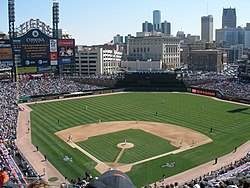

In [14]:
import requests, IPython.display as Disp
url = final_data[6]['Image']
Disp.Image(requests.get(url).content)

In [15]:
print(url)

HTTPS://upload.wikimedia.org/wikipedia/commons/thumb/e/e8/Tigers_opening_day2_2007.jpg/250px-Tigers_opening_day2_2007.jpg
